# Loadf the DOME 4.0 core ontology, 
this is the first step, we need to go through the entier ontologies and consolidate into an eco system

currently: 

1. the ontology is a patch work, no coherency,
2. EurosciVoc is not used !


## Tasks:
1. load the `~/dev/ontology/dome/Ontology-matters/dome4.0_core.ttl`
   - Working forlder: `~/dev/ontology/ontology_manager`
3. 


# Create initial Tier1 repository for DOME 4.0 

1. create a ~ 100 datasets according to the data set ontoly (Tier1, either fake or from e.g., materials project)
   -  show SPARQL query for keyword etc, with result in graph mode. 
3. create fake user data base for testing Provenance (based on ontology)
   - add each USer as a data set to the ontology GDB
   - for each access of the user we create a Tier1 DS which is linked to the user and to the previous data set (time wise).
   - simulate multiple user access, and populate the clearing/provenance
   - show graphs for the use.  

In [1]:
from ontology_manager.ontology_utils import OntologyManager
from rdflib import Graph, URIRef, Namespace, Literal, BNode, collection
from rdflib.namespace import SKOS, RDF, RDFS, OWL

In [2]:
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph, rdflib_to_graphtool
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
from ontodot.ontodot import vis 
from ontodot.ontodot import OntoVis

In [4]:
from types import SimpleNamespace
import os

In [5]:
def printH(s):
    the_line = "=" * (len(s)+1)
    print(f"{s}:\n{the_line}")

In [6]:
def auto_bind_namespaces(g:Graph, prefixes_copy_paste_string):
    """
    prefixes_copy_paste_string is as the name suggestes a copy paste of the header in attl file with 
    the form: 
    @prefix dcat: <http://www.w3.org/ns/dcat#> .


    i.e, no additional comments... 
    and g is any Graph
    """
    split_to_lines = prefixes_copy_paste_string.strip().split("\n")
    for line in split_to_lines:
        the_parts = line.split()
        if the_parts[0] == "@prefix":
            prefix = the_parts[1].rstrip(":")
            uri = the_parts[2].lstrip("<").rstrip("> .")
            print(f"g.bind({prefix}, {Namespace(uri)})")
            g.bind(prefix, Namespace(uri))


In [7]:
dome=SimpleNamespace()

In [8]:
dome.g=Graph(bind_namespaces="rdflib")
dome.ns=Namespace('https://dome40.eu/semantics/dome4.0_core#')
dome.path = "/Users/adham/dev/ontology/dome/Ontology-matters/"
#dome.file='dome4.0_core.ttl' # this is one of the orig files. 
dome.file='dome4.0_core_tbox.ttl'


In [9]:
mio=Graph(bind_namespaces="rdflib")
mio.parse("/Users/adham/dev/ontology/ontology_manager/MIO/mio/mio.ttl")

<Graph identifier=Nf9b3c39f68a646df86f4436c89b5ee83 (<class 'rdflib.graph.Graph'>)>

In [10]:
dome.g.parse(os.path.join(dome.path, dome.file))
# we could add it to mio_manager manually actually, then use it as we want, 


<Graph identifier=Nc41a0a2d9a4a45f882a226b31d6c0802 (<class 'rdflib.graph.Graph'>)>

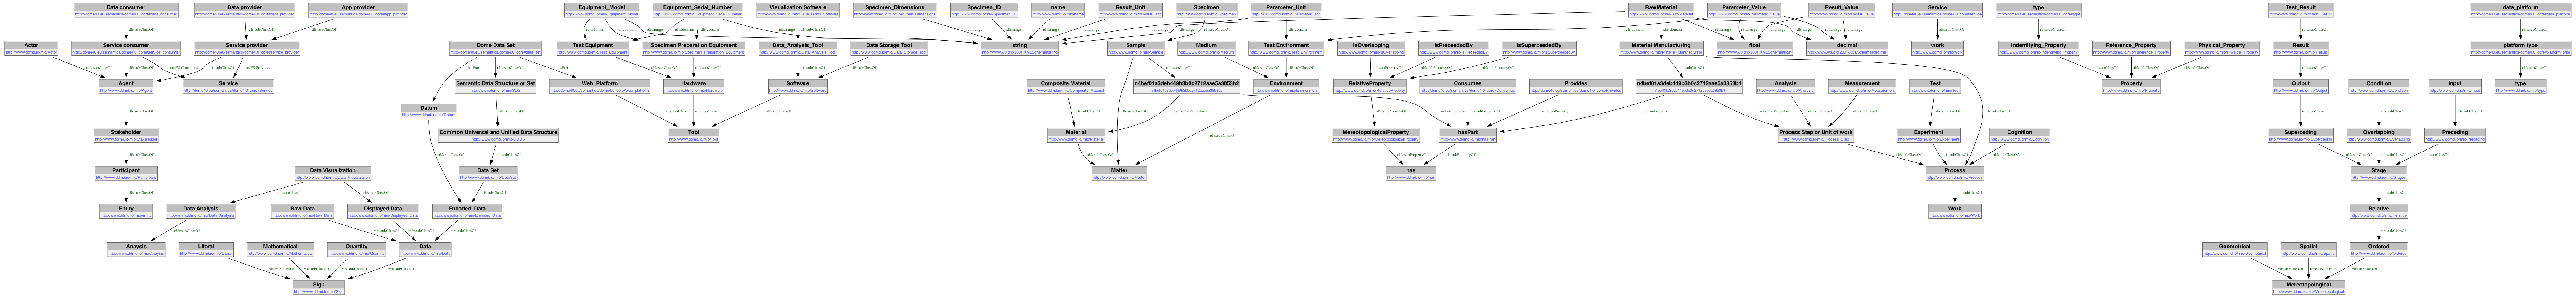

In [11]:
vis(dome.g+mio)

In [162]:

binds="""
@dome-core: <https://dome40.eu/semantics/dome4.0_core#> .
@prefix mio: <http://www.ddmd.io/mio/> .
@prefix dcat: <http://www.w3.org/ns/dcat#> .
@prefix dcterms: <http://purl.org/dc/terms/> .
@prefix euroscivoc: <http://data.europa.eu/8mn/euroscivoc/> .
@prefix evmpo: <https://emmc.eu/semantics/evmpo/evmpo.ttl#> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix http-meth: <http://www.w3.org/2011/http-methods#> .
@prefix msm: <http://iserve.kmi.open.ac.uk/ns/msm#> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix skos: <http://www.w3.org/2004/02/skos/core#> .
@prefix xs: <http://www.w3.org/2001/XMLSchema#> .
"""
auto_bind_namespaces(dome.g, binds)

g.bind(mio, http://www.ddmd.io/mio/)
g.bind(dcat, http://www.w3.org/ns/dcat#)
g.bind(dcterms, http://purl.org/dc/terms/)
g.bind(euroscivoc, http://data.europa.eu/8mn/euroscivoc/)
g.bind(evmpo, https://emmc.eu/semantics/evmpo/evmpo.ttl#)
g.bind(foaf, http://xmlns.com/foaf/0.1/)
g.bind(http-meth, http://www.w3.org/2011/http-methods#)
g.bind(msm, http://iserve.kmi.open.ac.uk/ns/msm#)
g.bind(owl, http://www.w3.org/2002/07/owl#)
g.bind(rdf, http://www.w3.org/1999/02/22-rdf-syntax-ns#)
g.bind(rdfs, http://www.w3.org/2000/01/rdf-schema#)
g.bind(skos, http://www.w3.org/2004/02/skos/core#)
g.bind(xs, http://www.w3.org/2001/XMLSchema#)


# Issue: Unnamed, Blind Nodes! 
There is an issue with many "non standard, non web friendly" constructus inherited from other ontologies that are included. 

e.g., all the below terms cannot be used in any suitable technology. 

In [122]:
for s,p,o in dome.g:
    if not isinstance(s, URIRef):
        print (p.n3(dome.g.namespace_manager), o.n3(dome.g.namespace_manager))
        dome.g.remove((s, p, o))

In [123]:
for s,p,o in dome.g:
    if not isinstance(s, URIRef):
        print (p.n3(dome.g.namespace_manager), o.n3(dome.g.namespace_manager))
        dome.g.remove((s, p, o))